In [ ]:
#export
from local.imports import *
from local.test import *
from local.core import *
from local.layers import *
from local.data.transform import *
from local.data.pipeline import *
from local.data.source import *
from local.data.core import *
from local.data.external import *
from local.optimizer import *
from local.learner import *
from local.metrics import *
from local.callback.schedule import *
from local.callback.progress import *
from local.callback.fp16 import *
from local.vision.core import *
from local.vision.augment import *

# Imagenette

> Integration test

In [ ]:
source = untar_data(URLs.IMAGENETTE_160)
items = get_image_files(source)
split_idx = RandomSplitter()(items)

In [ ]:
ds_img_tfms = [Resize(128)]
tfms = [PILImage.create, [parent_label, Categorize()]]

In [ ]:
dsrc = DataSource(items, tfms, filts=split_idx, ds_tfms=ds_img_tfms)

In [ ]:
tfms = [Cuda(), ByteToFloatTensor()] + aug_transforms()
dbch = dsrc.databunch(tfms, bs=64)

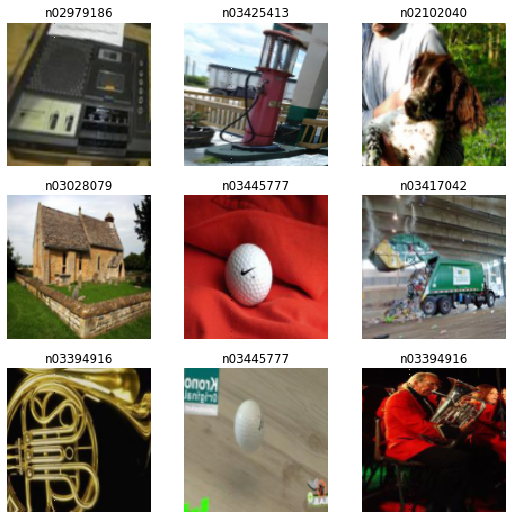

In [ ]:
_,axs = plt.subplots(3,3, figsize=(9,9))
dbch.show_batch(ctxs=axs.flatten())